___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


variable a predecir = outcome


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 6ms/step - loss: 0.6886 - accuracy: 0.5940
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6808 - accuracy: 0.5959
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.5978
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.6015
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6600 - accuracy: 0.6089
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6536 - accuracy: 0.6164
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6478 - accuracy: 0.6164
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6419 - accuracy: 0.6276
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6364 - accuracy: 0.6350
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6313 - accuracy: 0.6425
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7635
Epoch 85/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.7635
Epoch 86/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7635
Epoch 87/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7635
Epoch 88/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7635
Epoch 89/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7635
Epoch 90/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7635
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.7635
Epoch 92/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4942 - accuracy: 0.7654
Epoch 93/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.7654
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.7691
Epoch 168/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7691
Epoch 169/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.7709
Epoch 170/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7709
Epoch 171/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7709
Epoch 172/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7709
Epoch 173/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7709
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7709
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7709
Epoch 176/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7709
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

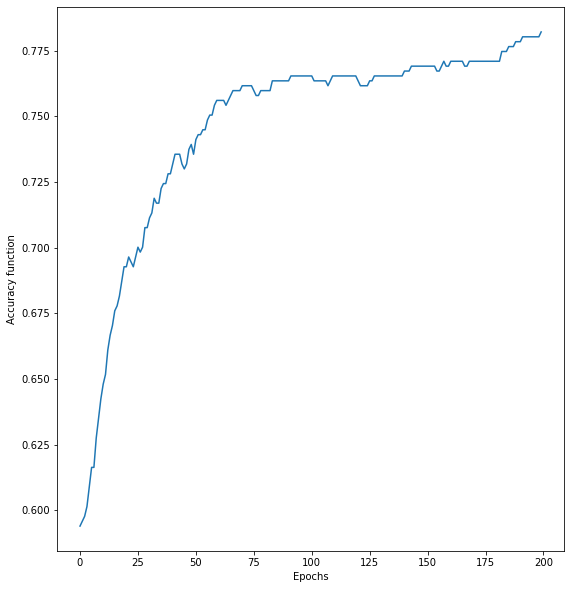

In [8]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Usar el modelo para predecir
#x_nueva_persona=[0,45,242,2456] y en y_pred le pones en vez de x_test es x_nueva_persona
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 2ms/step


In [10]:
Y_pred #Térmnos de probabilidades.

array([[0.2185646 ],
       [0.14992715],
       [0.11992194],
       [0.25391817],
       [0.5592241 ],
       [0.40663517],
       [0.02508816],
       [0.32884055],
       [0.6319225 ],
       [0.7354927 ],
       [0.27762476],
       [0.87523574],
       [0.5313621 ],
       [0.30782634],
       [0.07782052],
       [0.29428944],
       [0.10985543],
       [0.07905801],
       [0.40989447],
       [0.5222063 ],
       [0.2018487 ],
       [0.06975438],
       [0.3909555 ],
       [0.08247436],
       [0.61206293],
       [0.8964233 ],
       [0.1209698 ],
       [0.03656719],
       [0.29977605],
       [0.09880205],
       [0.8099732 ],
       [0.78646344],
       [0.77310157],
       [0.46530738],
       [0.64394164],
       [0.76694   ],
       [0.6922161 ],
       [0.21093701],
       [0.42102134],
       [0.4157939 ],
       [0.06082651],
       [0.4216846 ],
       [0.39988878],
       [0.45074308],
       [0.07845296],
       [0.6123754 ],
       [0.5247808 ],
       [0.196

In [11]:
Y_prob #Términos de 1 y 0s

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientrs mas grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 2ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.780 	 0.743 	 0.569
  Test 	 0.753 	 0.658 	 0.600


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [13]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [14]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = np_utils.to_categorical(Y).astype(int)

In [19]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [20]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [21]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax')) #tenemos 3 salidas

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',#funcion de costo como tenemos 3clases es categorical y no binary
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200


C:\Users\Regina\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 423ms/step - loss: 2.5605 - accuracy: 0.0917 - val_loss: 1.6233 - val_accuracy: 0.3000
Epoch 2/200
2/2 [==============================] - 0s 38ms/step - loss: 1.5057 - accuracy: 0.3583 - val_loss: 0.7481 - val_accuracy: 0.7000
Epoch 3/200
2/2 [==============================] - 0s 37ms/step - loss: 0.8084 - accuracy: 0.6333 - val_loss: 0.7193 - val_accuracy: 0.7000
Epoch 4/200
2/2 [==============================] - 0s 51ms/step - loss: 0.7409 - accuracy: 0.6583 - val_loss: 0.6543 - val_accuracy: 0.7000
Epoch 5/200
2/2 [==============================] - 0s 47ms/step - loss: 0.6876 - accuracy: 0.6583 - val_loss: 0.5718 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 34ms/step - loss: 0.6013 - accuracy: 0.6583 - val_loss: 0.4685 - val_accuracy: 0.7333
Epoch 7/200
2/2 [==============================] - 0s 47ms/step - loss: 0.4826 - accuracy: 0.6833 - val_loss: 0.4205 - val_accuracy: 0.8000
Epoch 8/200
2/2 [==============

2/2 [==============================] - 0s 64ms/step - loss: 0.2004 - accuracy: 0.9333 - val_loss: 0.0825 - val_accuracy: 1.0000
Epoch 60/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0795 - accuracy: 0.9750 - val_loss: 0.1649 - val_accuracy: 0.8667
Epoch 61/200
2/2 [==============================] - 0s 60ms/step - loss: 0.0874 - accuracy: 0.9500 - val_loss: 0.1601 - val_accuracy: 0.9333
Epoch 62/200
2/2 [==============================] - 0s 72ms/step - loss: 0.1906 - accuracy: 0.9333 - val_loss: 0.0789 - val_accuracy: 1.0000
Epoch 63/200
2/2 [==============================] - 0s 61ms/step - loss: 0.0814 - accuracy: 0.9750 - val_loss: 0.2321 - val_accuracy: 0.8667
Epoch 64/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0883 - accuracy: 0.9583 - val_loss: 0.3371 - val_accuracy: 0.8333
Epoch 65/200
2/2 [==============================] - 0s 64ms/step - loss: 0.3335 - accuracy: 0.8750 - val_loss: 0.0798 - val_accuracy: 1.0000
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 40ms/step - loss: 0.2082 - accuracy: 0.9333 - val_loss: 0.1269 - val_accuracy: 0.8667
Epoch 118/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0819 - accuracy: 0.9667 - val_loss: 0.0729 - val_accuracy: 0.9667
Epoch 119/200
2/2 [==============================] - 0s 41ms/step - loss: 0.1065 - accuracy: 0.9583 - val_loss: 0.0706 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 41ms/step - loss: 0.0875 - accuracy: 0.9750 - val_loss: 0.3751 - val_accuracy: 0.8333
Epoch 121/200
2/2 [==============================] - 0s 48ms/step - loss: 0.1829 - accuracy: 0.9250 - val_loss: 0.0831 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 0s 52ms/step - loss: 0.0665 - accuracy: 0.9833 - val_loss: 0.0656 - val_accuracy: 0.9667
Epoch 123/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0841 - accuracy: 0.9667 - val_loss: 0.0846 - val_accuracy: 1.0000
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0709 - accuracy: 0.9750 - val_loss: 0.0868 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0730 - accuracy: 0.9667 - val_loss: 0.2016 - val_accuracy: 0.8667
Epoch 177/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0995 - accuracy: 0.9500 - val_loss: 0.1022 - val_accuracy: 0.9333
Epoch 178/200
2/2 [==============================] - 0s 56ms/step - loss: 0.0705 - accuracy: 0.9667 - val_loss: 0.0684 - val_accuracy: 0.9667
Epoch 179/200
2/2 [==============================] - 0s 53ms/step - loss: 0.0856 - accuracy: 0.9667 - val_loss: 0.0847 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 48ms/step - loss: 0.0691 - accuracy: 0.9750 - val_loss: 0.1104 - val_accuracy: 0.9333
Epoch 181/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0734 - accuracy: 0.9667 - val_loss: 0.0666 - val_accuracy: 1.0000
Epoch 

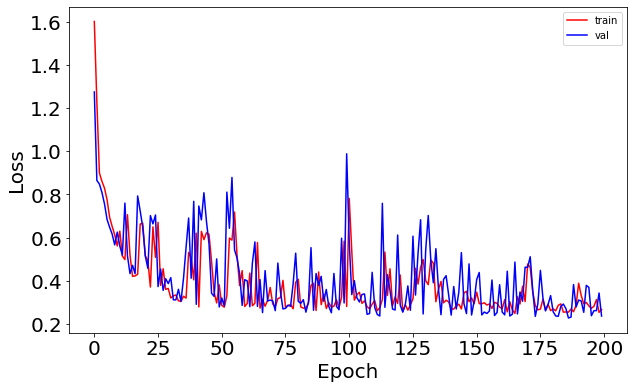

In [22]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Cuando esta muy asi de loco modificamos el momentum y e learning rate con un cross validations

In [23]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 39ms/step


In [24]:
Y_pred

array([[5.0536923e-06, 9.5866531e-01, 4.1329626e-02],
       [9.9989963e-01, 1.0038446e-04, 5.5378650e-20],
       [2.6297276e-16, 1.4496574e-04, 9.9985504e-01],
       [4.3781597e-06, 9.4045770e-01, 5.9537977e-02],
       [6.0114085e-06, 9.8478568e-01, 1.5208314e-02],
       [9.9976200e-01, 2.3795813e-04, 1.7404749e-18],
       [2.2745267e-03, 9.9766243e-01, 6.3034568e-05],
       [1.9157711e-09, 7.7875040e-02, 9.2212498e-01],
       [2.9978531e-07, 4.1247112e-01, 5.8752865e-01],
       [4.1941015e-04, 9.9913031e-01, 4.5036626e-04],
       [9.3601003e-09, 1.6404884e-01, 8.3595121e-01],
       [9.9952281e-01, 4.7717133e-04, 3.0014765e-17],
       [9.9991918e-01, 8.0860780e-05, 2.3254081e-20],
       [9.9956948e-01, 4.3050948e-04, 1.9926395e-17],
       [9.9984741e-01, 1.5252220e-04, 2.9144719e-19],
       [6.0090551e-06, 9.8410636e-01, 1.5887678e-02],
       [2.8731634e-13, 1.2215177e-03, 9.9877852e-01],
       [2.0829713e-04, 9.9800628e-01, 1.7854631e-03],
       [3.7933767e-06, 9.005

In [25]:
Y_prob #aqui si me conviene hacerlo redondeado

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [26]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [27]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [28]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')#average=weighted lo usamos para multiclase para que jale el código.
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 29ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 0.967 	 0.969 	 0.967


Salió un muy buen modelo 